# RNN 变体

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## 导入数据

In [6]:
num_words = 10000
maxlen = 100

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000,)   (25000,)
(25000,)   (25000,)


In [8]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen, padding='post')
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen, padding='post')

In [9]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(25000, 100)   (25000,)
(25000, 100)   (25000,)


## LSTM

In [11]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
        layers.LSTM(32, return_sequences=True),
        layers.LSTM(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 32)           8320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 1)                 136       
Total params: 328,456
Trainable params: 328,456
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5


W0909 14:03:50.073580 140735620006784 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1394: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


22500/22500 [==============================] - 35s 2ms/sample - loss: 0.4846 - accuracy: 0.7551 - val_loss: 0.3804 - val_accuracy: 0.8376
Epoch 2/5
22500/22500 [==============================] - 30s 1ms/sample - loss: 0.2804 - accuracy: 0.8892 - val_loss: 0.3772 - val_accuracy: 0.8368
Epoch 3/5
22500/22500 [==============================] - 30s 1ms/sample - loss: 0.2188 - accuracy: 0.9191 - val_loss: 0.3839 - val_accuracy: 0.8380
Epoch 4/5
22500/22500 [==============================] - 30s 1ms/sample - loss: 0.1773 - accuracy: 0.9391 - val_loss: 0.3990 - val_accuracy: 0.8396
Epoch 5/5
22500/22500 [==============================] - 30s 1ms/sample - loss: 0.1448 - accuracy: 0.9513 - val_loss: 0.4862 - val_accuracy: 0.8316
CPU times: user 4min 43s, sys: 1min 7s, total: 5min 50s
Wall time: 2min 35s


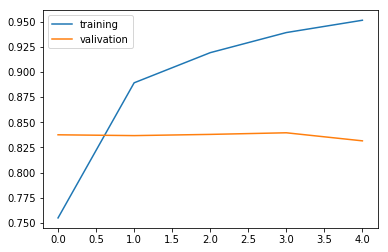

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## GRU

In [15]:
def lstm_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
        layers.GRU(32, return_sequences=True),
        layers.GRU(1, activation='sigmoid', return_sequences=False)
    ])
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

model = lstm_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
gru_2 (GRU)                  (None, 100, 32)           6336      
_________________________________________________________________
gru_3 (GRU)                  (None, 1)                 105       
Total params: 326,441
Trainable params: 326,441
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 40s 2ms/sample - loss: 0.5023 - accuracy: 0.7373 - val_loss: 0.3692 - val_accuracy: 0.8388
Epoch 2/5
22500/22500 [==============================] - 36s 2ms/sample - loss: 0.2931 - accuracy: 0.8832 - val_loss: 0.3557 - val_accuracy: 0.8444
Epoch 3/5
22500/22500 [==============================] - 36s 2ms/sample - loss: 0.2274 - accuracy: 0.9135 - val_loss: 0.3683 - val_accuracy: 0.8416
Epoch 4/5
22500/22500 [==============================] - 36s 2ms/sample - loss: 0.1865 - accuracy: 0.9331 - val_loss: 0.4338 - val_accuracy: 0.8328
Epoch 5/5
22500/22500 [==============================] - 35s 2ms/sample - loss: 0.1447 - accuracy: 0.9515 - val_loss: 0.4379 - val_accuracy: 0.8356
CPU times: user 5min 11s, sys: 1min 15s, total: 6min 27s
Wall time: 3min 2s


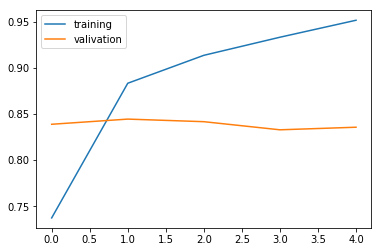

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()